In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.ticker import MaxNLocator

In [11]:
df = pd.read_csv('data/mgm-predictions.csv')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
print(df)

         date  min1  min2  min3  min4  min5  max1  max2  max3  max4  max5
0  2025-11-21   4.0   NaN   NaN   NaN   NaN  18.0   NaN   NaN   NaN   NaN
1  2025-11-22   4.0   5.0   NaN   NaN   NaN  21.0  21.0   NaN   NaN   NaN
2  2025-11-23   8.0   7.0   7.0   NaN   NaN  21.0  21.0  21.0   NaN   NaN
3  2025-11-24   8.0   7.0   8.0   8.0   NaN  15.0  13.0  13.0  14.0   NaN
4  2025-11-25   NaN   4.0   3.0   4.0   6.0   NaN  16.0  14.0  13.0  12.0
5  2025-11-26   4.0   NaN   3.0   2.0   1.0  16.0   NaN  16.0  14.0  14.0
6  2025-11-27   5.0   4.0   NaN   3.0   2.0  17.0  16.0   NaN  17.0  16.0
7  2025-11-28   5.0   5.0   4.0   NaN   4.0  17.0  17.0  17.0   NaN  17.0
8  2025-11-29   4.0   4.0   5.0   4.0   NaN  15.0  15.0  16.0  14.0   NaN
9  2025-11-30   NaN   8.0   5.0   6.0   5.0   NaN  13.0  13.0  13.0  14.0
10 2025-12-01   NaN   NaN   5.0   3.0   3.0   NaN   NaN  11.0  11.0  10.0
11 2025-12-02   1.0   NaN   NaN   2.0   1.0  11.0   NaN   NaN  11.0  11.0
12 2025-12-03   1.0   1.0   NaN   NaN 

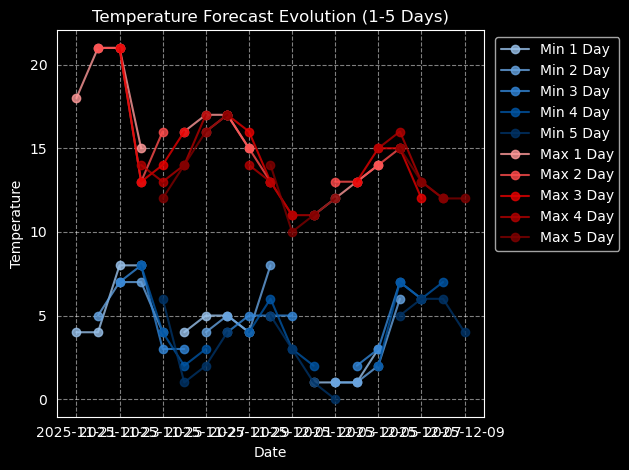

In [13]:
blue_shades = ['#99C2EB', '#66A3E0', '#3385D6', '#0055A4', '#003366']
red_shades  = ['#FF9999', '#FF4D4D', '#E60000', '#B30000', '#800000']

for i in range(1, 6):
    plt.plot(df['date'], df[f'min{i}'], marker='o', linestyle='-',
             color=blue_shades[i-1], label=f'Min {i} Day', alpha=0.8)

for i in range(1, 6):
    plt.plot(df['date'], df[f'max{i}'], marker='o', linestyle='-',
             color=red_shades[i-1], label=f'Max {i} Day', alpha=0.8)

plt.title('Temperature Forecast Evolution (1-5 Days)')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
days = [2, 3, 4, 5]
min_diffs = {}
max_diffs = {}

for d in days:
    min_diffs[d] = (df[f'min{d}'] - df['min1']).dropna()
    max_diffs[d] = (df[f'max{d}'] - df['max1']).dropna()

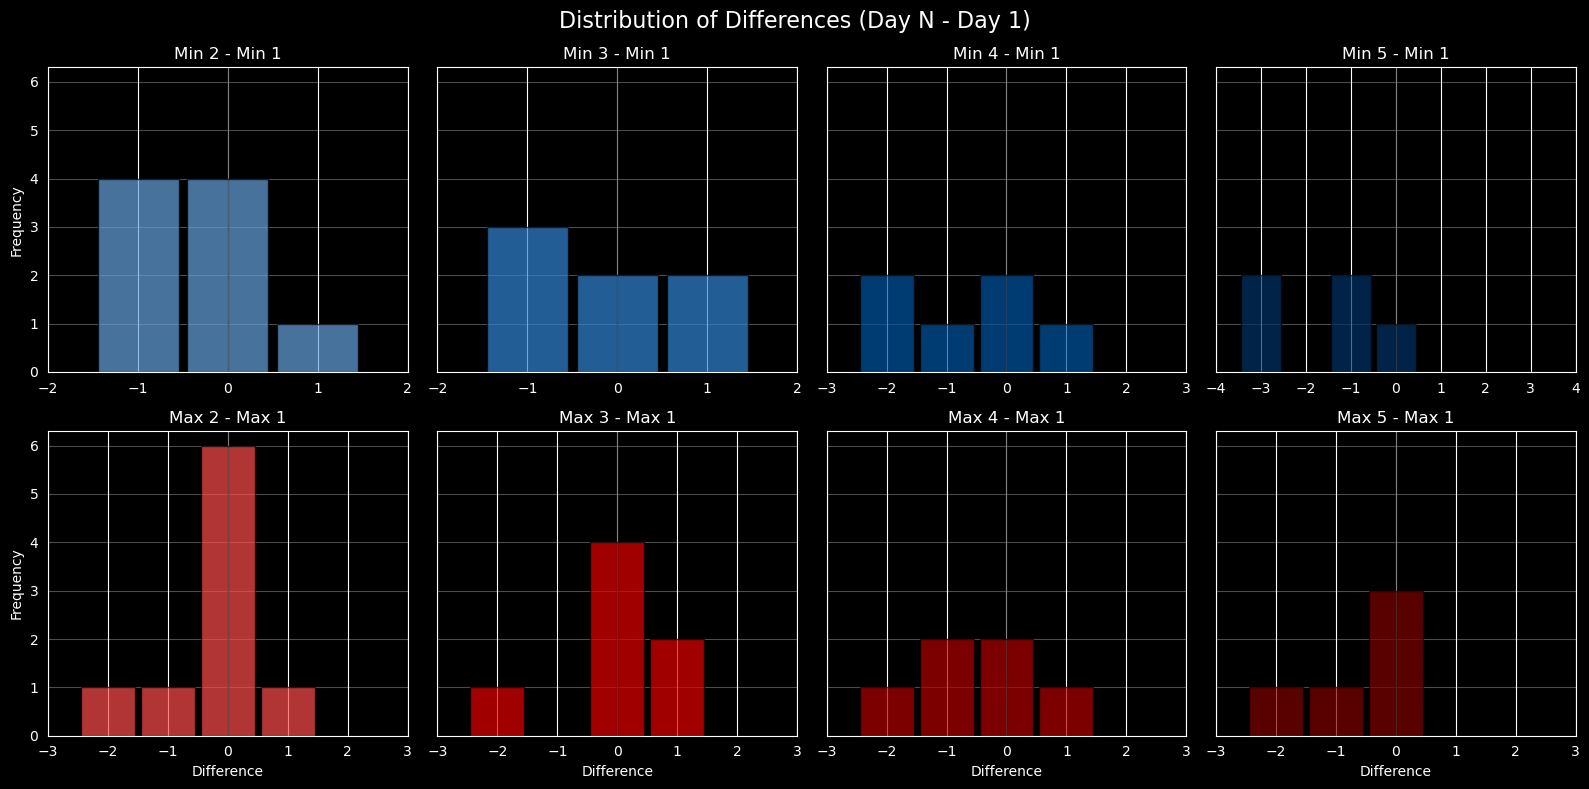

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
fig.suptitle('Distribution of Differences (Day N - Day 1)', fontsize=16)

def plot_integer_hist(ax, data, color, title, show_xlabel=False, show_ylabel=False):
    if len(data) > 0:
        max_val = max(abs(data.min()), abs(data.max()))
        limit = np.ceil(max_val) + 1
    else:
        limit = 2

    bins = np.arange(-limit - 0.5, limit + 1.5, 1)
    ax.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7, rwidth=0.9)
    ax.set_title(title)
    ax.grid(axis='y', alpha=0.3)
    ax.set_xlim(-limit, limit)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)

    if show_xlabel: ax.set_xlabel('Difference')
    if show_ylabel: ax.set_ylabel('Frequency')

for i, d in enumerate(days):
    plot_integer_hist(axes[0, i], min_diffs[d], blue_shades[d-1],
                      f'Min {d} - Min 1', show_ylabel=(i==0))

for i, d in enumerate(days):
    plot_integer_hist(axes[1, i], max_diffs[d], red_shades[d-1],
                      f'Max {d} - Max 1', show_xlabel=True, show_ylabel=(i==0))

plt.tight_layout()
plt.show()


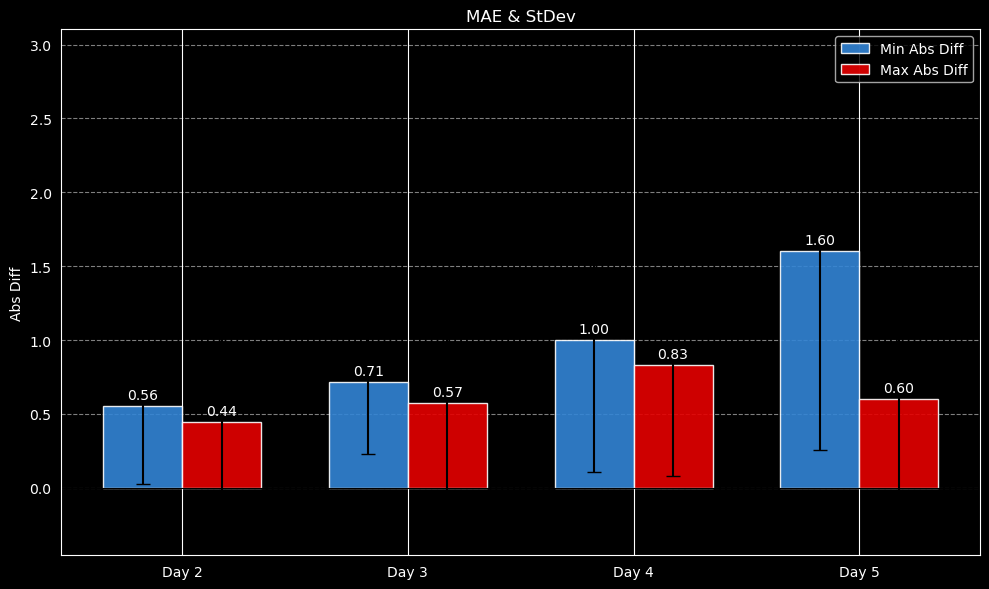

In [22]:
min_means = []
min_stds = []
max_means = []
max_stds = []

for d in days:
    abs_min = (df[f'min{d}'] - df['min1']).abs().dropna()
    abs_max = (df[f'max{d}'] - df['max1']).abs().dropna()

    min_means.append(abs_min.mean())
    min_stds.append(abs_min.std())
    max_means.append(abs_max.mean())
    max_stds.append(abs_max.std())

x = np.arange(len(days))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, min_means, width, label='Min Abs Diff',
                yerr=min_stds, capsize=5, color=blue_shades[2], alpha=0.9)
rects2 = ax.bar(x + width/2, max_means, width, label='Max Abs Diff',
                yerr=max_stds, capsize=5, color=red_shades[2], alpha=0.9)

ax.set_ylabel('Abs Diff')
ax.set_title('MAE & StDev')
ax.set_xticks(x)
ax.set_xticklabels([f'Day {d}' for d in days])
ax.axhline(0, color='black', linewidth=0.8)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()